In [11]:
import numpy as np

array1 = np.array([14.19, 14.45, 14.2, 14.21, 14.19])
array2 = np.array([13.61, 13.59, 13.47, 13.66, 13.67])
array3 = np.array([12.62, 12.47, 12.42, 12.88, 12.23])
array4 = np.array([12.14, 12.28, 12.43, 12.23, 12.28])
stdoftime1 = np.std(array1)
stdoftime2 = np.std(array2)
stdoftime3 = np.std(array3)
stdoftime4 = np.std(array4)
print("STD time1",stdoftime1)
print("STD time2",stdoftime2)
print("STD time3",stdoftime3)
print("STD time4",stdoftime4)


average_error = (stdoftime1 + stdoftime2 +stdoftime3 + stdoftime4)/np.sqrt(20)
print(average_error)
print(np.mean(array1))
print(np.mean(array2))
print(np.mean(array3))
print(np.mean(array4))
Averagetime = (np.mean(array1) + np.mean(array2) + np.mean(array3) +np.mean(array4))/4
print("Averagetime/r", Averagetime)

STD time1 0.10127191120937713
STD time2 0.07155417527999304
STD time3 0.21731083728153094
STD time4 0.09410632284814842
0.10828008170853899
14.248000000000001
13.6
12.524000000000001
12.272
Averagetime/r 13.161


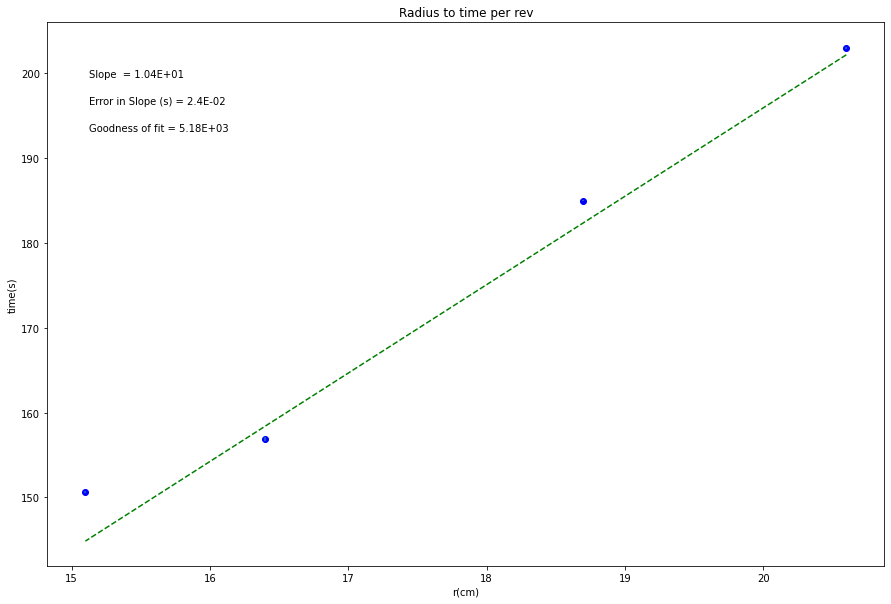

In [9]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
xvariable_r = np.array([20.6, 18.7, 16.4, 15.1]) #what are units?
yvariable_time = np.array([14.248**2,13.6**2,12.524**2,12.272**2]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_yvariable_time = np.array([stdoftime1, stdoftime2, stdoftime3, stdoftime4])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = xvariable_r   #this should be the array you want to plot on the x axis
y = yvariable_time
dy = err_yvariable_time  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('r(cm)')
plt.ylabel('time(s)')
plt.title('Radius to time per rev')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope  = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (s) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
